<a href="https://colab.research.google.com/github/bahiensed/ml/blob/main/04_Metro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IV. PROBLEMA DE REGRESSÃO**

# 1. Preparativos
---

## 1.1 Importar Bibliotecas e Módulos

In [ ]:
#importar bibliotecas e módulos necessários
import numpy
from numpy import arange
from numpy import set_printoptions

from matplotlib import pyplot

from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error

import joblib

## 1.2 Parâmetros

In [ ]:
# Opções e métricas para treino e teste
test_size = 0.20
seed = 7
num_folds = 10
scoring = 'neg_mean_squared_error'

# 2. Dados
---

## 2.1 Obter Dados

In [ ]:
#endereço dos dados originais
#pode ser modificado para endereço local na própria máquina
url = "https://gist.githubusercontent.com/dbahiense/71a84ad6965874e4446d409b227ae304/raw/690f040fd5ea03148e922a9e5aee53f5a46f60c6/metro.csv"

#nome dos atributos
columns = ['holiday','temp','rain_1h','snow_1h','clouds_all','weather_main','weather_description','date_time','traffic_volume']

#lê o arquivo
data = read_csv(url, names=columns)

## 2.2 Entender Dados

### 2.2.1 Descrever Dados

In [ ]:
#mostra as dimensões do dataset
shape = data.shape #(linhas, colunas)
shape

(48204, 9)

In [ ]:
#mostra as primeiras n instâncias dos dados
peek = data.head() #head(n) para mostrar as primeiras n linhas, default n = 5
peek

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [ ]:
#mostra os tipos de dados de cada atributo (coluna)
types = data.dtypes
types

holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
traffic_volume           int64
dtype: object

In [ ]:
#lista valores únicos das colunas não numéricas
#holiday, weather_main, weather_description
holidays = data['holiday'].unique()
weather_main = data['weather_main'].unique()
weather_descriptions = data['weather_description'].unique()

#print(holidays)
print(weather_main)
#print(weather_descriptions)

#https://sparkbyexamples.com/pandas/pandas-find-unique-values-from-columns/

['Clouds' 'Clear' 'Rain' 'Drizzle' 'Mist' 'Haze' 'Fog' 'Thunderstorm'
 'Snow' 'Squall' 'Smoke']


In [ ]:
def holi(x):
  if x == 'None':
    return 0
  elif x == 'Columbus Day':
    return 1
  elif x == 'Veterans Day':
    return 2
  elif x == 'Thanksgiving Day':
    return 3
  elif x == 'Christmas Day':
    return 4
  elif x == 'New Years Day':
    return 5
  elif x == 'Washingtons Birthday':
    return 6
  elif x == 'Memorial Day':
    return 7
  elif x == 'Independence Day':
    return 8
  elif x == 'State Fair':
    return 9
  elif x == 'Labor Day':
    return 10
  elif x == 'Martin Luther King Jr Day':
    return 11

def main(y):
  if y == 'Clouds':
    return 0
  elif y == 'Clear':
    return 1
  elif y == 'Rain':
    return 2
  elif y == 'Drizzle':
    return 3
  elif y == 'Mist':
    return 4
  elif y == 'Haze':
    return 5
  elif y == 'Fog':
    return 6
  elif 'Thunderstorm':
    return 7
  elif 'Snow':
    return 8
  elif 'Squall':
    return 9
  elif 'Smoke':
    return 10

data['holinumber'] = data.holiday.apply(holi)
data['w_main_num'] = data.weather_main.apply(main)


data = data[['holinumber', 'temp',	'rain_1h',	'snow_1h',	'clouds_all', 'w_main_num',	'date_time',	'holiday',	'weather_main',	'weather_description', 'traffic_volume']]

data

,holinumber,temp,rain_1h,snow_1h,clouds_all,w_main_num,date_time,holiday,weather_main,weather_description,traffic_volume
0,0,288.28,0.0,0.0,40,0,2012-10-02 09:00:00,None,Clouds,scattered clouds,5545
1,0,289.36,0.0,0.0,75,0,2012-10-02 10:00:00,None,Clouds,broken clouds,4516
2,0,289.58,0.0,0.0,90,0,2012-10-02 11:00:00,None,Clouds,overcast clouds,4767
3,0,290.13,0.0,0.0,90,0,2012-10-02 12:00:00,None,Clouds,overcast clouds,5026
4,0,291.14,0.0,0.0,75,0,2012-10-02 13:00:00,None,Clouds,broken clouds,4918
...,...,...,...,...,...,...,...,...,...,...,...
48199,0,283.45,0.0,0.0,75,0,2018-09-30 19:00:00,None,Clouds,broken clouds,3543
48200,0,282.76,0.0,0.0,90,0,2018-09-30 20:00:00,None,Clouds,overcast clouds,2781
48201,0,282.73,0.0,0.0,90,7,2018-09-30 21:00:00,None,Thunderstorm,proximity thunderstorm,2159
48202,0,282.09,0.0,0.0,90,0,2018-09-30 22:00:00,None,Clouds,overcast clouds,1450


### 2.2.2 Estatística Descritiva

In [ ]:
#mostra os dados estatísticos de cada atributo (coluna)
set_option('precision', 1) #precisão de uma casa decimal após a vírgula
description = data.describe()
description

,holinumber,temp,rain_1h,snow_1h,clouds_all,w_main_num,traffic_volume
count,4.8e+04,48204.0,48204.0,4.8e+04,48204.0,48204.0,48204.0
mean,7.7e-03,281.2,0.3,2.2e-04,49.4,1.9,3259.8
std,2.5e-01,13.3,44.8,8.2e-03,39.0,2.2,1986.9
min,0.0e+00,0.0,0.0,0.0e+00,0.0,0.0,0.0
25%,0.0e+00,272.2,0.0,0.0e+00,1.0,0.0,1193.0
50%,0.0e+00,282.4,0.0,0.0e+00,64.0,1.0,3380.0
75%,0.0e+00,291.8,0.0,0.0e+00,90.0,4.0,4933.0
max,1.1e+01,310.1,9831.3,5.1e-01,100.0,7.0,7280.0


In [ ]:
#mostra a correlação entre os atributos
set_option('precision', 2) #precisão de duas casas decimais após a vírgula
#métodos podem ser: pearson, spearman ou kendall
correlations = data.corr(method = 'pearson')
correlations

,holinumber,temp,rain_1h,snow_1h,clouds_all,w_main_num,traffic_volume
holinumber,1.00e+00,-2.91e-03,-1.67e-04,-8.59e-04,-5.67e-03,4.24e-03,-3.78e-02
temp,-2.91e-03,1.00e+00,9.07e-03,-1.98e-02,-1.02e-01,-1.34e-01,1.30e-01
rain_1h,-1.67e-04,9.07e-03,1.00e+00,-8.98e-05,4.82e-03,2.39e-03,4.71e-03
snow_1h,-8.59e-04,-1.98e-02,-8.98e-05,1.00e+00,2.79e-02,4.15e-02,7.33e-04
clouds_all,-5.67e-03,-1.02e-01,4.82e-03,2.79e-02,1.00e+00,2.61e-01,6.71e-02
w_main_num,4.24e-03,-1.34e-01,2.39e-03,4.15e-02,2.61e-01,1.00e+00,-8.64e-02
traffic_volume,-3.78e-02,1.30e-01,4.71e-03,7.33e-04,6.71e-02,-8.64e-02,1.00e+00


In [ ]:
#mostra a distorção (obliquidade) das distribuições univariadas
skew = data.skew(numeric_only=True)
skew

holinumber         35.55
temp               -2.25
rain_1h           219.39
snow_1h            48.37
clouds_all         -0.20
w_main_num          1.11
traffic_volume     -0.09
dtype: float64

## 2.3 Visualizar Dados

### 2.3.1 Gráficos Univariados

#### 2.3.1.1 Histograma

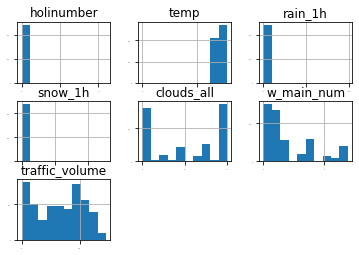

In [ ]:
data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

#### 2.3.1.2 Gráficos de Densidade

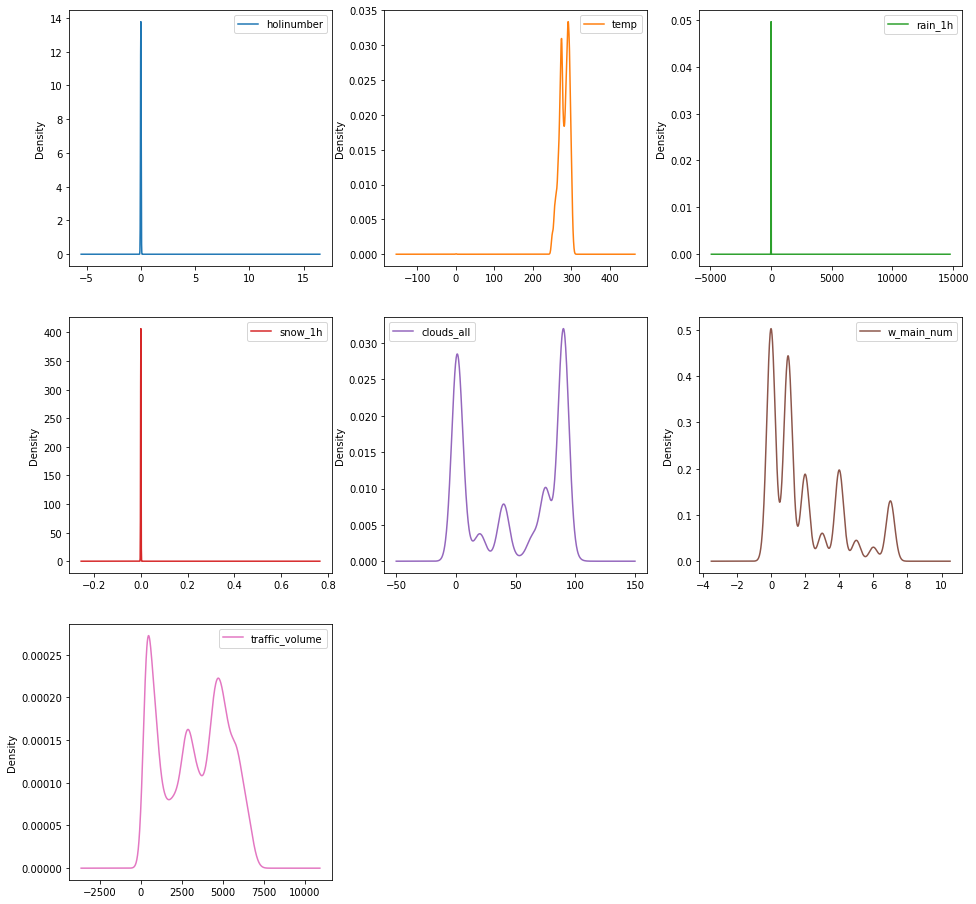

In [ ]:
#gráficos de densidade
#atenção ao layout para caberem todos os gráficos (x * y >= n° de atributos)
data.plot(figsize=(16, 16), kind='density', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()

#### 2.3.1.3 Box Plot

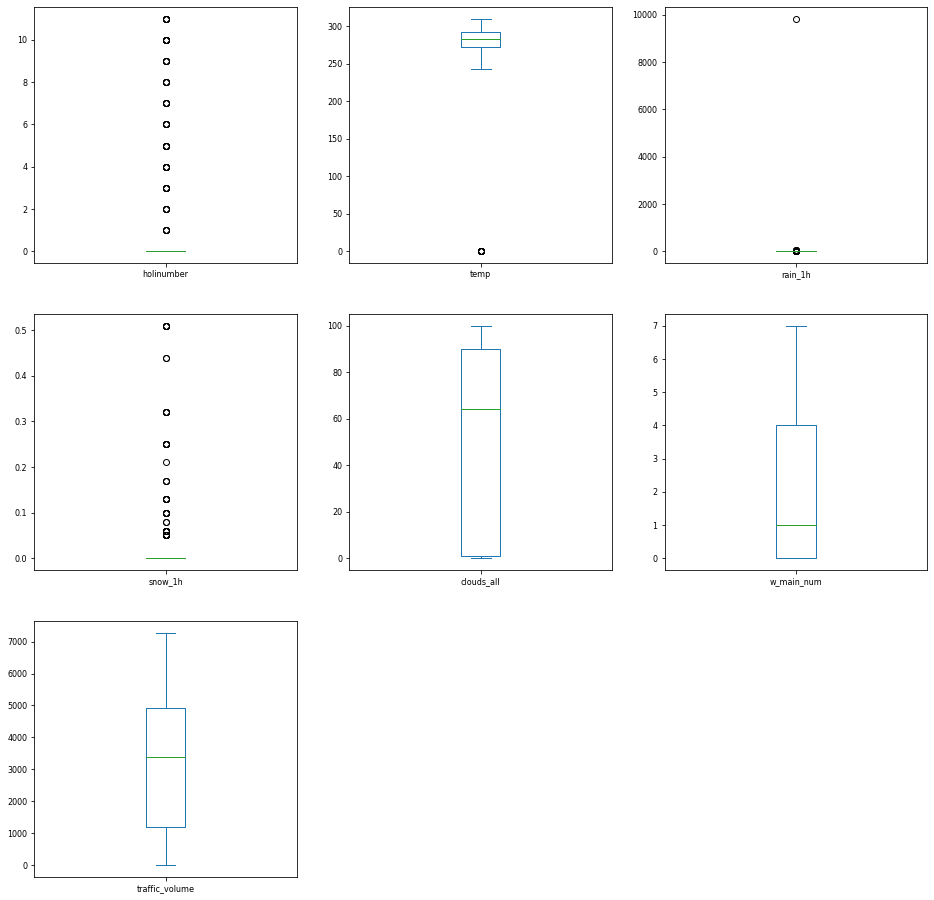

In [ ]:
#box plot
#atenção ao layout 5,para caberem todos os gráficos (x * y >= n° de atributos)
data.plot(figsize=(16,16), kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, fontsize=8)
pyplot.show()

### 2.3.2 Gráficos Multivariados

#### 2.3.2.1 Matriz de Correlação

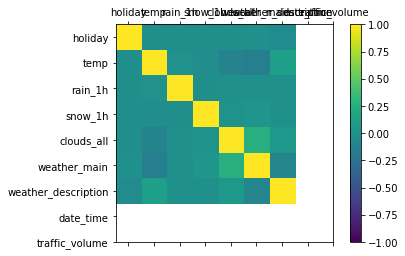

In [ ]:
#matriz de correlação
#corr = 1 atributos diretamente correlacionados
#corr = 0 atributos não relacionados
#corr = -1 atributos inversamente correlacionados
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)
pyplot.show()

#### 2.3.2.2 Scatter Plot

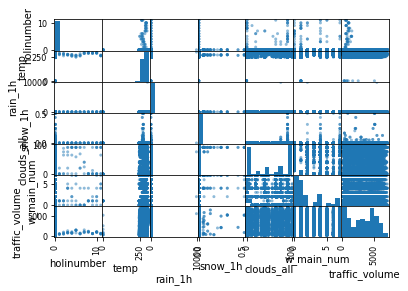

In [ ]:
scatter_matrix(data)
pyplot.show()

## 2.4 Preparar Dados

### 2.4.1 Padronizar Dados

In [ ]:
#dispõe os dados em forma de array
array = data.values

#fatia os dados em um conjunto de inputs X e outro de output y
X = array[ : , :5]
y = array[ : , 10]

#padroniza os dados (fit and transform)
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

#imprime os dados padronizados
set_printoptions(precision=3) #precisão de três casas decimais após a vírgula
print(X)
print(y)

[[-0.032  0.53  -0.007 -0.027 -0.24 ]
 [-0.032  0.611 -0.007 -0.027  0.657]
 [-0.032  0.628 -0.007 -0.027  1.042]
 ...
 [-0.032  0.114 -0.007 -0.027  1.042]
 [-0.032  0.066 -0.007 -0.027  1.042]
 [-0.032  0.069 -0.007 -0.027  1.042]]
[5545 4516 4767 ... 2159 1450 954]


### 2.4.2 Reduzir Dados

### 2.4.3 Fatiar Dados
Separa um conjunto de dados para o treinamento e um outro conjunto de dados para os testes.

In [ ]:
#From documentation: split array or matrix into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

#3. Algoritmos
---

## 3.1 Avaliar Algoritmos

### 3.1.1 Selecionar Algoritmos

In [ ]:
#seleção de algoritmos
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
#models.append(('SVR', SVR()))

models

[('LR', LinearRegression()),
 ('LASSO', Lasso()),
 ('EN', ElasticNet()),
 ('KNN', KNeighborsRegressor()),
 ('CART', DecisionTreeRegressor())]

### 3.1.2 Comparar Algoritmos

In [ ]:
#lista dos nomes dos algoritmos
names = []
#lista dos resultados dos algoritmos
results = []

print(f" {'Algoritmo'} | {'Média':<8} | {'Desvio'}")
print(32 * '-')

for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)

  #imprimir nome do algoritmo, média e desvio padrão
  msg = f" {name:<9} | {cv_results.mean():.4f} | {cv_results.std():.4f}"
  print(msg)
  print(32 * '-')

  #insere nome do algoritmo na lista names
  names.append(name)
  #insere resultado do algoritmo na lista results
  results.append(cv_results)

 Algoritmo | Média    | Desvio
--------------------------------
 LR        | -22750523.9975 | 56736763.4638
--------------------------------
 LASSO     | -8127087.0808 | 12866630.1777
--------------------------------
 EN        | -3851489.6693 | 38326.9324
--------------------------------
 KNN       | -4005771.0853 | 65508.6899
--------------------------------
 CART      | -4813433.2971 | 91744.9543
--------------------------------
 SVR       | -3843413.6131 | 41908.8616
--------------------------------


### 3.1.3 Visualizar Comparação

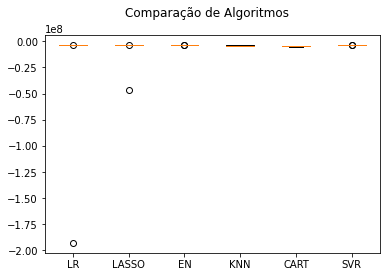

In [ ]:
#comparação gráfica dos algoritmos
fig = pyplot.figure()
fig.suptitle('Comparação de Algoritmos')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## 3.2 Melhorar Desempenho do Melhor Algoritmo

A seção anterior mostrou que dentre todos os algoritmos utilizados, KNN obteve o melhor resultado sobre os dados. Vamos tentar melhor um pouco mais o seu desempenho ajustando alguns de seus parâmetros. Mais especificamente vamos testar vários valores diferentes para grid / param_grid / k_values (explicar).

### 3.2.1 Ajustar Parâmetros

In [ ]:
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21,23,24,25,27,29])

#modelo que apresentou o melhor resultado
model = ElasticNet()

#ordena os parâmetros a serem testados
param_grid = dict(n_neighbors=k_values)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)

grid_result = grid.fit(X_train, y_train)

### 3.2.2 Apresentar Resultados

In [ ]:
#resultado dos testes com os diferentes parâmetros (n_neighbors / k_values)
print("Melhor resultado: %f usando %s \n" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) >>> %r" % (mean, stdev, param))

Melhor resultado: -17.798343 usando {'n_neighbors': 1} 

-17.798343 (11.855517) >>> {'n_neighbors': 1}
-19.724398 (13.013086) >>> {'n_neighbors': 3}
-21.234601 (14.678103) >>> {'n_neighbors': 5}
-21.908162 (14.878562) >>> {'n_neighbors': 7}
-20.901575 (14.874368) >>> {'n_neighbors': 9}
-20.964099 (14.709432) >>> {'n_neighbors': 11}
-21.171776 (14.510093) >>> {'n_neighbors': 13}
-21.848382 (14.162750) >>> {'n_neighbors': 15}
-22.639304 (14.510971) >>> {'n_neighbors': 17}
-23.346438 (14.678070) >>> {'n_neighbors': 19}
-24.004403 (14.923301) >>> {'n_neighbors': 21}
-24.785894 (15.207430) >>> {'n_neighbors': 23}
-25.184727 (15.324407) >>> {'n_neighbors': 24}
-25.421165 (15.457568) >>> {'n_neighbors': 25}
-26.105244 (15.897893) >>> {'n_neighbors': 27}
-27.018320 (16.414491) >>> {'n_neighbors': 29}


## 3.3 Avaliar Desempenho de Comitês de Algoritmos

Para além do uso de algoritmos podemos (e devemos) avaliar o desempenho dos comitês de algoritmos para conferir se eles apresentam bons resultados.

### 3.3.1 Selecionar Comitês de Algoritmos

In [ ]:
#comitês
ensembles = []

#boosting
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

#bagging
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor(n_estimators=10))])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor(n_estimators=10))])))

---
**Nota:**  
Por que selecionamos esses comitês?

### 3.3.2 Comparar Comitês

In [ ]:
#lista dos nomes dos comitês
names = []
#lista dos resultados dos comitês
results = []

print(f" {'Algoritmo'} | {'Média':<8} | {'Desvio'}")
print(32 * '-')

for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)

  #imprimir nome do algoritmo, média e desvio padrão
  msg = f" {name:<9} | {cv_results.mean():.4f} | {cv_results.std():.4f}"
  print(msg)
  print(32 * '-')

  #insere nome do algoritmo na lista names
  names.append(name)
  #insere resultado do algoritmo na lista results
  results.append(cv_results)

 Algoritmo | Média    | Desvio
--------------------------------
 ScaledAB  | -3711999.2770 | 36461.7002
--------------------------------
 ScaledGBM | -3640419.7461 | 41784.7342
--------------------------------
 ScaledRF  | -4146075.3530 | 87137.8363
--------------------------------
 ScaledET  | -4434594.3482 | 72122.6310
--------------------------------


### 3.3.3 Visualizar Comparação

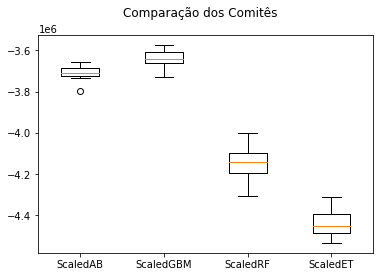

In [ ]:
fig = pyplot.figure()
fig.suptitle('Comparação dos Comitês')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## 3.4 Melhorar Desempenho do Melhor Comitê

A seção anterior mostrou que dentre todos os comitês utilizados, ET obteve o melhor resultado sobre os dados. Vamos tentar melhor um pouco mais o seu desempenho ajustando alguns de seus parâmetros. Mais especificamente vamos testar vários valores diferentes para grid / param_grid / k_values (explicar).

### 3.4.1 Ajustar Parâmetros


In [ ]:
#refinar GBM
param_grid = dict(n_estimators=numpy.array([50, 100, 150, 200, 250, 300, 400, 500, 600]))

model = GradientBoostingRegressor(random_state=seed)

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)

grid_result = grid.fit(X_train, y_train)

### 3.4.2 Apresentar Resultados

In [ ]:
#resultado
print("Melhor resultado: %f usando %s \n" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) >>> %r" % (mean, stdev, param))

Melhor resultado: -3590677.288995 usando {'n_estimators': 600} 

-3659407.371289 (39464.985090) >>> {'n_estimators': 50}
-3640437.547453 (41818.850652) >>> {'n_estimators': 100}
-3627063.575368 (43253.522199) >>> {'n_estimators': 150}
-3619435.525678 (44619.178654) >>> {'n_estimators': 200}
-3612753.579117 (46287.240857) >>> {'n_estimators': 250}
-3608230.767234 (46533.359821) >>> {'n_estimators': 300}
-3600783.763953 (47399.944866) >>> {'n_estimators': 400}
-3595973.650710 (48712.859053) >>> {'n_estimators': 500}
-3590677.288995 (48078.785930) >>> {'n_estimators': 600}


##4. Finalizar Modelo

## 4.1 Gravar Modelo

In [ ]:
model = GradientBoostingRegressor(random_state=seed, n_estimators=150)
model.fit(X_train, y_train)

#gravar o modelo no disco
filename = 'boston_model.sav'
joblib.dump(model, filename)

['boston_model.sav']

## 4.2 Carregar Modelo

In [ ]:
#carregar modelo do disco
loaded_model = joblib.load(filename)

## 4.3 Usar Modelo

Vamos agora aplicar o modelo nos dados de teste ainda não utilizados.

In [ ]:
result = loaded_model.score(X_test, y_test)
print(f'Score: {result}')

prediction = loaded_model.predict(X_test)
mean2error = mean_squared_error(y_test, prediction)
print(f'Erro: {mean2error}')

Score: 0.07973429608053129
Erro: 3672647.6883176896
